In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise

## Trilobites - deformation of elliptical objects

Image the piece of rock with many trilobite fossils. They have random orientation, but all have same axial ratio `ar = 1.4`.

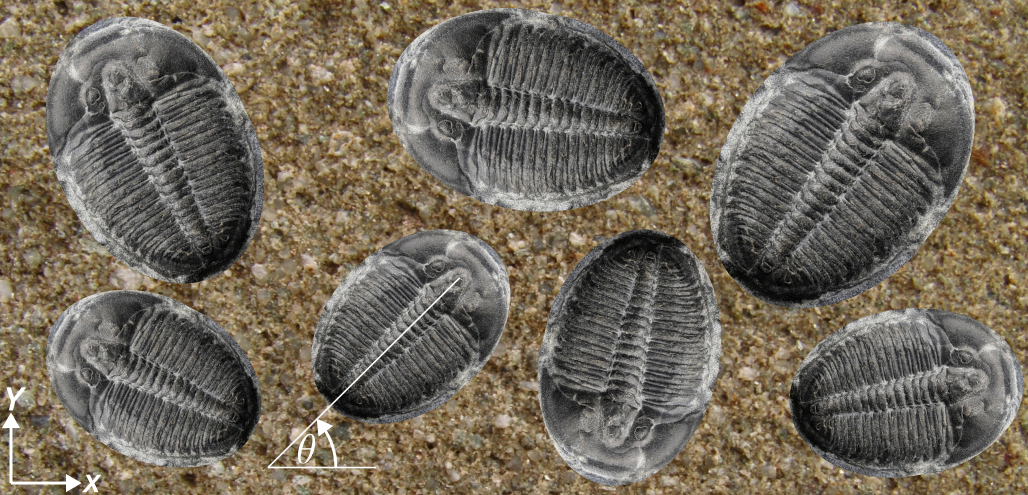

This rock is deformed by simple shear deformation defined by deformation gradient

$$\mathbf{F}=\begin{bmatrix}1 & \gamma\\ 0 & 1\end{bmatrix}$$

for $\gamma$ in range from 0 to 1. Your task is to find:
  - for what initial orientation $\theta$ and value of $\gamma$ envelope of trilobite becomes circular after deformation (i.e. `ar = 1`)?
  - for what initial orientation $\theta$ the trilobite will preserve bilaterall symmetry after deformation with $\gamma=0.5$?
  - for what initial orientation $\theta$ the trilobite will have highest axial ratio after deformation $\gamma=1$?

Note that $\theta$ is defined as angle between x-axis and long axis of trilobite measure anticlockwise from x-axis

### For what initial orientation $\theta$ and value of $\gamma$ envelope of trilobite becomes circular after deformation?

In [3]:
nrows, ncols = 140, 140
gammas, thetas = np.meshgrid(np.linspace(0, 1, ncols), np.linspace(0, 180, nrows))
ars = np.zeros_like(gammas)

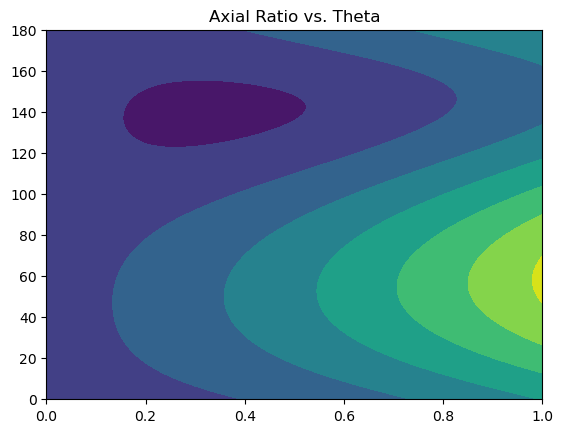

In [5]:
U = np.array([[np.sqrt(1.4), 0],
              [0, 1/np.sqrt(1.4)]])
for row in range (nrows):
    for col in range (ncols):
        theta = np.radians(thetas[row, col])
        R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        D = np.array([[1, gammas[row, col]], [0, 1]])
        F = D  @ R @ U
        evals, evecs = np.linalg.eigh(F @ F.T)
        ars[row, col] = np.sqrt(evals[1]/evals[0])
        
plt.contourf(gammas, thetas, ars)
plt.title('Axial Ratio vs. Theta');

### For what initial orientation $\theta$ the trilobite will preserve bilaterall symmetry after deformation with $\gamma$=0.5

In [28]:
thetas = np.linspace(0, 180, 500)
angs = []
D = np.array([[1, 0.5], [0, 1]])

for theta in np.radians(thetas):
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    la = D  @ R @ U @ np.array([1, 0])
    sa = D  @ R @ U @ np.array([0, 1])
    cosa = np.dot(la, sa)/(np.linalg.norm(la) * np.linalg.norm(sa))
    angs.append(np.degrees(np.arccos(cosa)))
angs = np.array(angs)

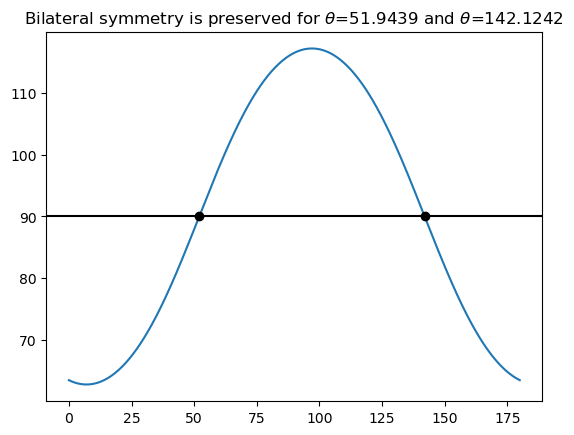

In [29]:
plt.plot(thetas, angs)
plt.axhline(90, color = 'k')
ix1 = np.nanargmin(abs(angs - 90))
angs[ix1] = np.nan
ix2 = np.nanargmin(abs(angs - 90))
plt.plot(thetas[ix1], 90, 'ko')
plt.plot(thetas[ix2], 90, 'ko')
plt.title(fr'Bilateral symmetry is preserved for $\theta$={thetas[ix1]:.4f} and $\theta$={thetas[ix2]:.4f}');

### For what initial orientation $\theta$ the trilobite will have highest axial ratio after deformation $\gamma=1$?

In [20]:
thetas = np.linspace(0, 180, 500)
ars = []
D = np.array([[1, 1], [0, 1]])

for theta in np.radians(thetas):
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    F = D  @ R @ U
    evals, evecs = np.linalg.eigh(F @ F.T)
    ars.append(np.sqrt(evals[1]/evals[0]))
        
ars = np.array(ars)

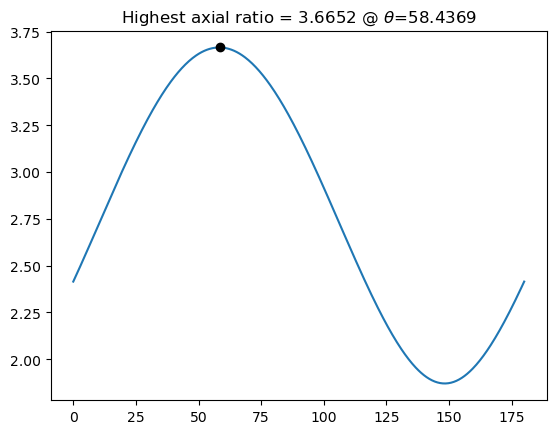

In [26]:
plt.plot(thetas, ars)
ix = np.argmax(ars)
plt.plot(thetas[ix], ars[ix], 'ko')
plt.title(fr'Highest axial ratio = {ars[ix]:.4f} @ $\theta$={thetas[ix]:.4f}');